## Exploratory Data Analysis of Credir card transactions dataset

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


__Goal:__ To identify fraud transactions

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset and peeking few rows
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Observations:
- *There are no nulls i.e. No missing data in the dataset*
- *The columns V1 - V28 are transaction details, but the details about them are not mentioned due to privacy concerns*
- *All the deatures are the principal components obtained with PCA except Time and Amount*

In [4]:
# statistics of some columns (other than transaction details)
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


### Class distribution

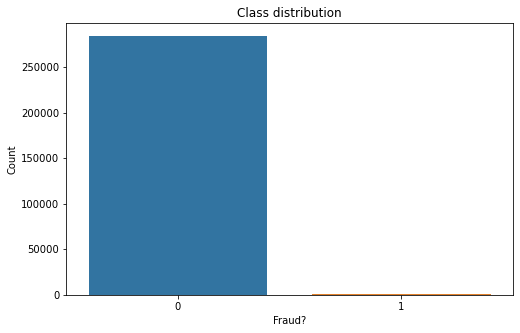

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(df['Class'])
plt.title('Class distribution')
plt.ylabel('Count')
plt.xlabel('Fraud?')
plt.show()

##### Observations:
- *The dataset looks highly imbalanced*
- *fraud transactions are way smaller than the not fraud ones*

In [6]:
# class distribution in numbers
print('0 - Normal & 1 - Fraud\n')
print(df['Class'].value_counts())

0 - Normal & 1 - Fraud

0    284315
1       492
Name: Class, dtype: int64


### Exploring time feature

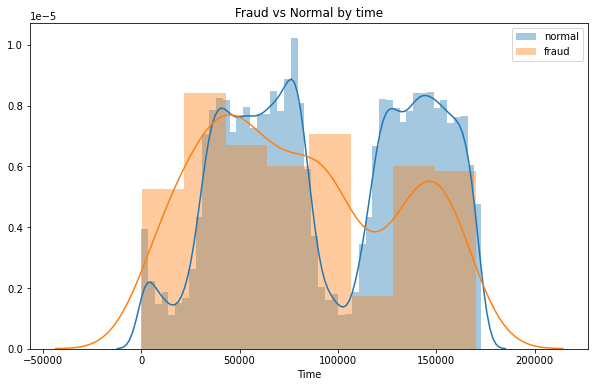

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Class']==0]['Time'], label='normal')
sns.distplot(df[df['Class']==1]['Time'], label='fraud')
plt.title('Fraud vs Normal by time')
plt.legend()
plt.show()

##### Observations

- *It is not very clear to interpret anything from this plot*


- *Upsample the time feature into minutes and plot again*

In [8]:
# converting seconds to minutes

delta = pd.to_timedelta(df['Time'], unit='s')
df['Time_minutes'] = (delta.dt.components.minutes).astype(int)

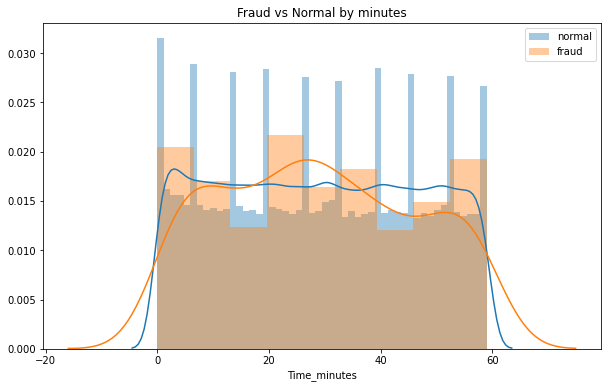

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Class']==0]['Time_minutes'], label='normal')
sns.distplot(df[df['Class']==1]['Time_minutes'], label='fraud')
plt.title('Fraud vs Normal by minutes')
plt.legend()
plt.show()

- *it is awesome but still not very clear*

- *upsample to hours*

In [10]:
df['Time_hours'] = (delta.dt.components.hours).astype(int)

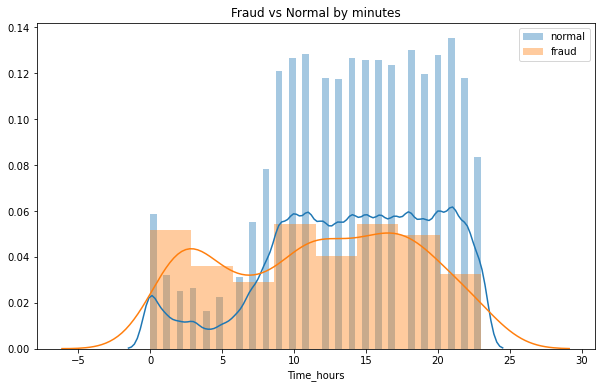

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Class']==0]['Time_hours'], label='normal')
sns.distplot(df[df['Class']==1]['Time_hours'], label='fraud')
plt.title('Fraud vs Normal by minutes')
plt.legend()
plt.show()

### Exploring transaction amount

In [12]:
# statictics of transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

print('Normal transaction statistics: ')
print(normal.Amount.describe())
print('Fraud transaction statistics: ')
print(fraud.Amount.describe())

Normal transaction statistics: 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
Fraud transaction statistics: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


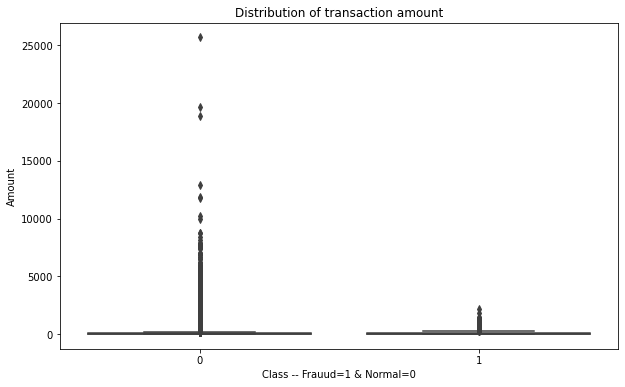

In [13]:
# distribution of amounts

plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of transaction amount')
plt.ylabel('Amount')
plt.xlabel('Class -- Frauud=1 & Normal=0')
plt.show()

- *It is very hard to understand this plot*

In [14]:
# taking log of amount

np.seterr(divide = 'ignore')
df['logAmount'] = np.log(df.Amount)

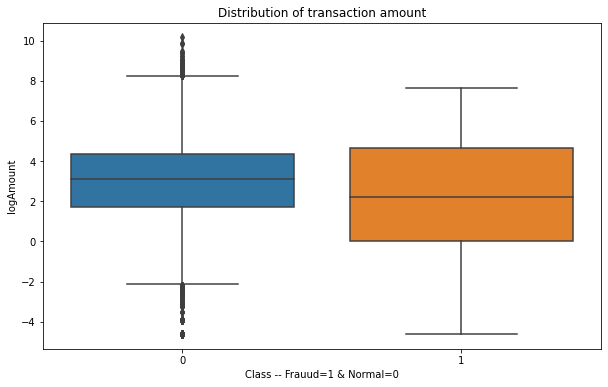

In [15]:
# distribution of amounts

plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='logAmount', data=df)
plt.title('Distribution of transaction amount')
plt.ylabel('logAmount')
plt.xlabel('Class -- Frauud=1 & Normal=0')
plt.show()

- *Normal transactions have higher Amounts*
- *But IQR of fraud transactions amount higher than normal transactions*

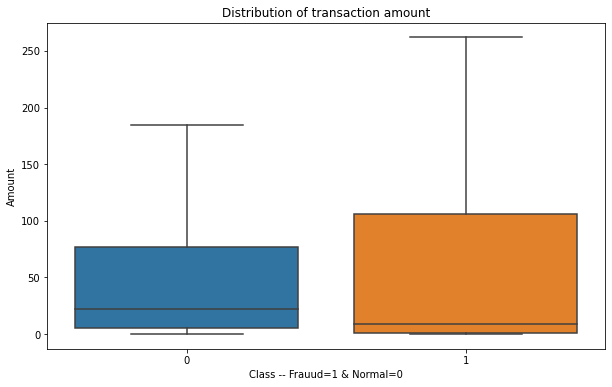

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False)
plt.title('Distribution of transaction amount')
plt.ylabel('Amount')
plt.xlabel('Class -- Frauud=1 & Normal=0')
plt.show()

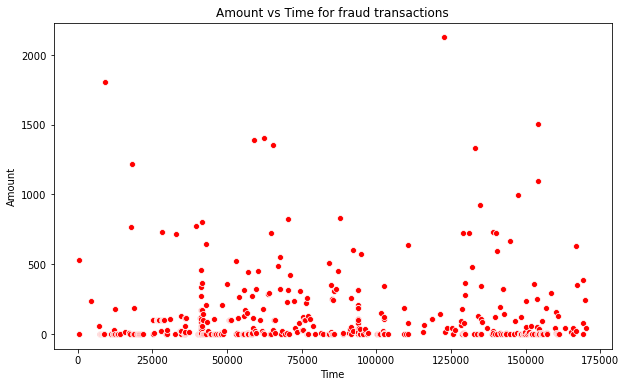

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', data=fraud, color='r')
plt.title('Amount vs Time for fraud transactions')
plt.show()

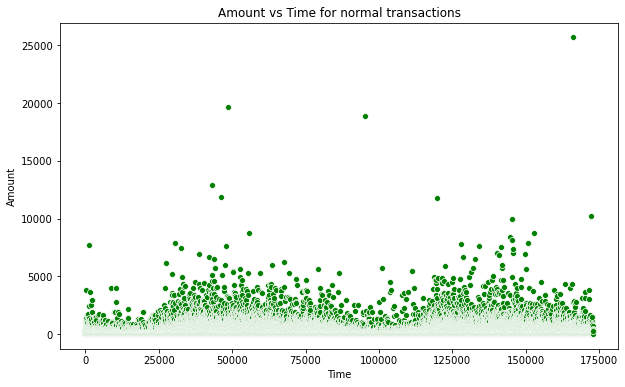

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', data=normal, color='g')
plt.title('Amount vs Time for normal transactions')
plt.show()

### Exploring Transaction features

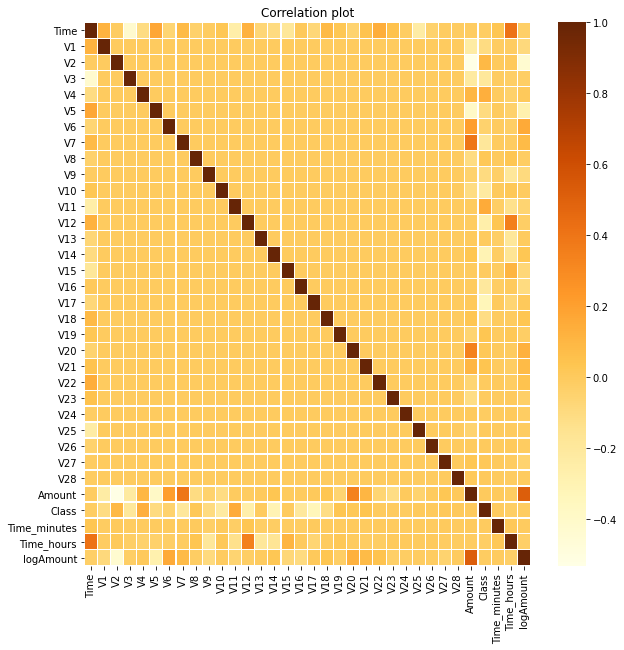

In [19]:
# correlatioon between all the features

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap='YlOrBr')
plt.title('Correlation plot')
plt.show()

##### Observations:
- *no observable correlartion between features V1-V28*
- *Amount is correlated with V7 and V20*
- *also inversely correlated with V2 and V5*

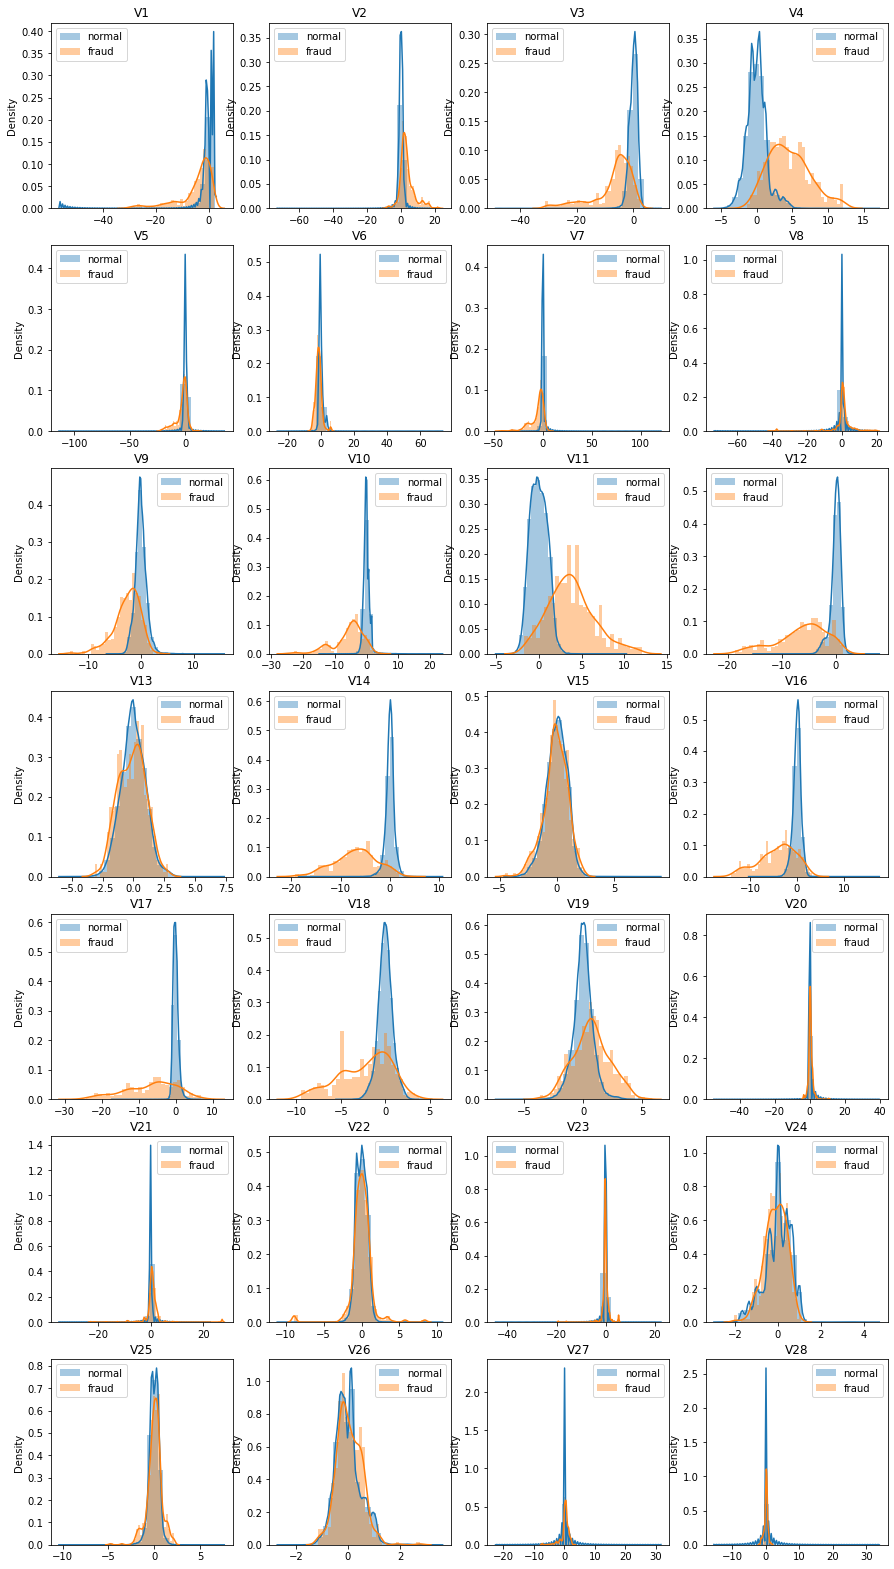

In [20]:
#Looking the V's features
import matplotlib.gridspec as gridspec

columns = df.iloc[:,1:29].columns

fraud = df.Class == 1
normal = df.Class == 0

grid = gridspec.GridSpec(7, 4)
plt.figure(figsize=(15, 7*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][normal], bins = 30, label='normal') #Will receive the "ocean" color
    sns.distplot(df[col][fraud], bins = 30, label='fraud') #Will receive the "semi-salmon" violin
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    plt.legend()
    
plt.show()

##### Obseravtions
- *The distributions of V4, V9, V16, V17 are interesting!*